## Advanced Lane Finding Project

Goals:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


## Camera Calibration

#### Imports

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
from ipywidgets import interact, interactive, fixed
from moviepy.editor import VideoFileClip
from IPython.display import HTML
%matplotlib inline

Found 17 image with corner.


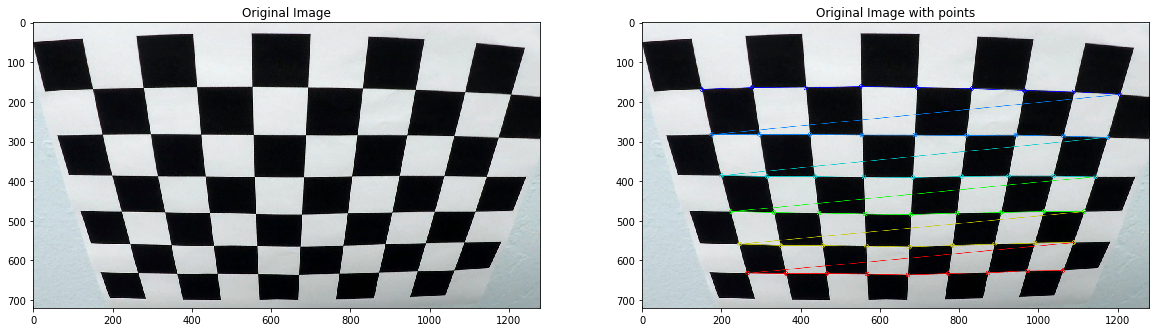

In [3]:
# Reference: 
# - https://github.com/udacity/CarND-Camera-Calibration/blob/master/camera_calibration.ipynb

# ############# Make a list of calibration images   ######
images = list(map(lambda imageFileName: (imageFileName, cv2.imread(imageFileName)), glob.glob('../camera_cal/c*.jpg')))

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
############### change chessboard size to 9x6 instead of 8x6. ###############
objp = np.zeros((6*9,3), np.float32) 
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) # x and y cordinates.

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
undistortedimages = []
originalimages = []

# Step through the list and search for chessboard corners
for image in images:
    fileName, image = image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

        # Draw and display the corners
        img_points = cv2.drawChessboardCorners(image.copy(), (9,6), corners, ret)
        undistortedimages.append(img_points)
        originalimages.append(image)

print('Found {} image with corner.'.format(len(undistortedimages)))

index = 10
original = originalimages[index]
chessPoints = undistortedimages[index]
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
axes[0].imshow(original)
axes[0].set_title('Original Image')
axes[1].imshow(chessPoints)
axes[1].set_title('Original Image with points')


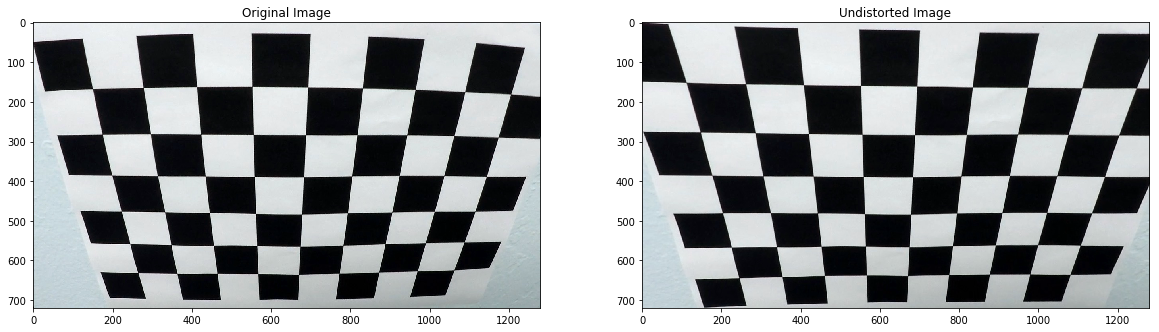

In [4]:

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, original.shape[0:2], None, None)

undist = cv2.undistort(original, mtx, dist, None, mtx)

fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
axes[0].imshow(original)
axes[0].set_title('Original Image')
axes[1].imshow(undist)
axes[1].set_title('Undistorted Image')

In [5]:
import pickle
pickle.dump( { 'mtx': mtx, 'dist': dist }, open('../camera_calibration_pickle.p', 'wb'))